<a href="https://colab.research.google.com/github/SreeKumara/STML/blob/main/STML_LAB_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, f1_score, roc_curve, roc_auc_score
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [11]:
# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)

In [13]:
# Preprocessing
# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


In [14]:
# Define features and target
X = data_encoded.drop(columns=['expenses'])
y = data_encoded['expenses']

In [15]:
# Normalize numerical features (age, bmi, children)
scaler = StandardScaler()
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])


In [19]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'RMSE': root_mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

In [20]:

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'SVR': SVR(kernel='rbf')
}

In [22]:
# Train and evaluate models
results = {name: evaluate_model(model, X_train, y_train, X_test, y_test) for name, model in models.items()}


In [23]:
# Classification task
median_expenses = y_train.median()
y_train_class = (y_train > median_expenses).astype(int)
y_test_class = (y_test > median_expenses).astype(int)

In [24]:

# Train classifiers for binary classification
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train_class)

RandomForestClassifier(random_state=42)

In [32]:
# Classification metrics for other models
classification_results = {}

# Loop through models to calculate classification metrics
for name, model in models.items():
    # Predict using the regression models
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > median_expenses).astype(int)

    # Compute accuracy and F1 score
    accuracy = accuracy_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)

    classification_results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1
    }

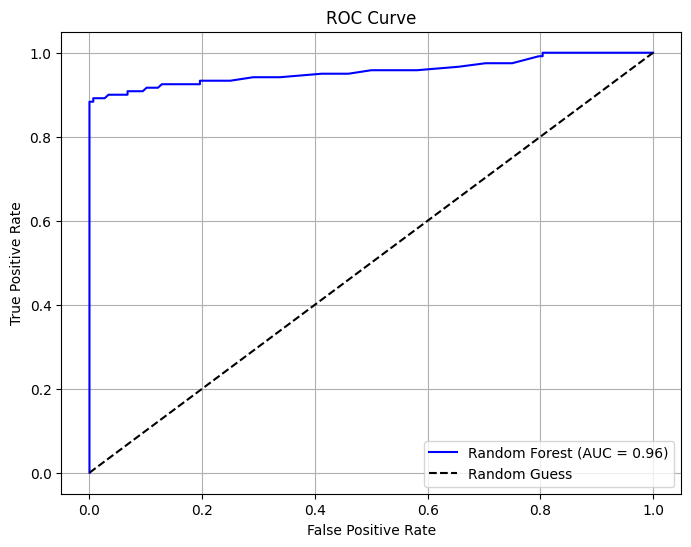

In [25]:
# Predict probabilities for ROC curve
y_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_class, y_proba_rf)
auc_score = roc_auc_score(y_test_class, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

<ipython-input-26-2ba221eac534>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=features[sorted_indices], palette='viridis')


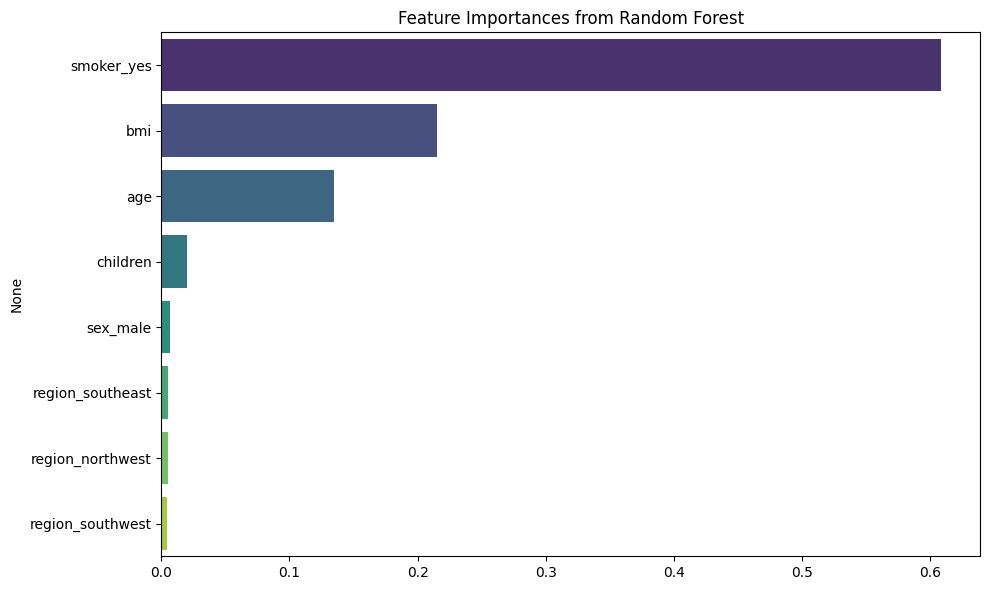

In [26]:
# Visualizations
# Feature Importances
feature_importances = models['Random Forest'].feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=features[sorted_indices], palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

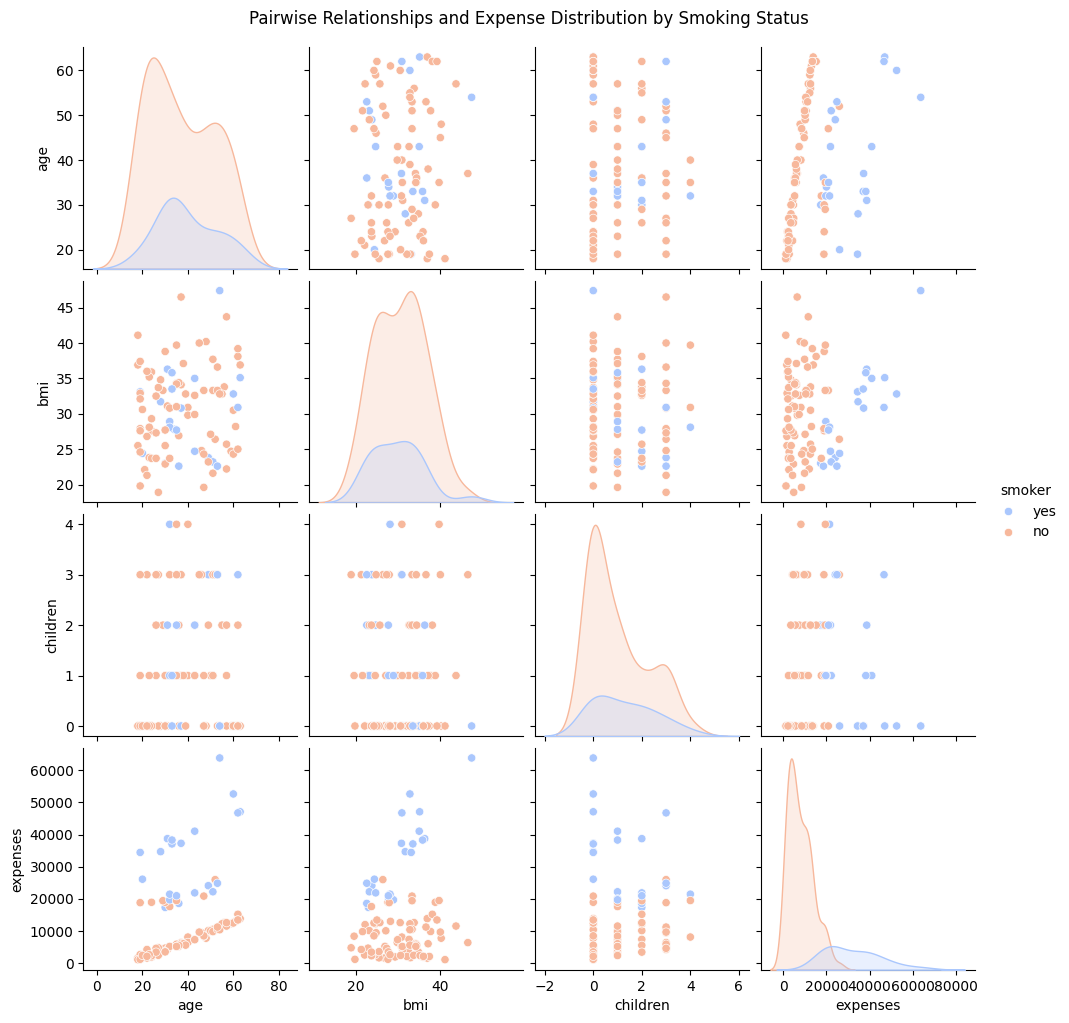

In [27]:
# Pairplot for numerical features and expenses
sns.pairplot(data.sample(100), vars=['age', 'bmi', 'children', 'expenses'], diag_kind='kde', hue='smoker', palette='coolwarm')
plt.suptitle('Pairwise Relationships and Expense Distribution by Smoking Status', y=1.02)
plt.show()


<ipython-input-28-3efeb2fb687b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='region', y='expenses', palette='coolwarm')


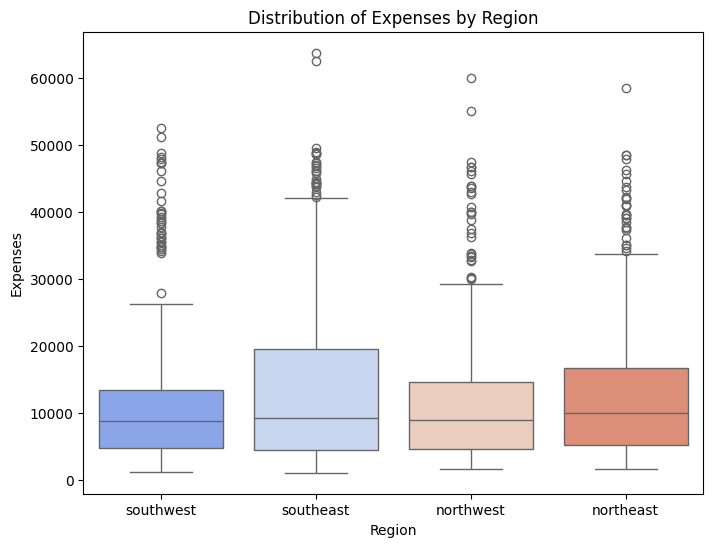

In [28]:
# Boxplot: Expenses vs. Region
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='region', y='expenses', palette='coolwarm')
plt.title('Distribution of Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.show()

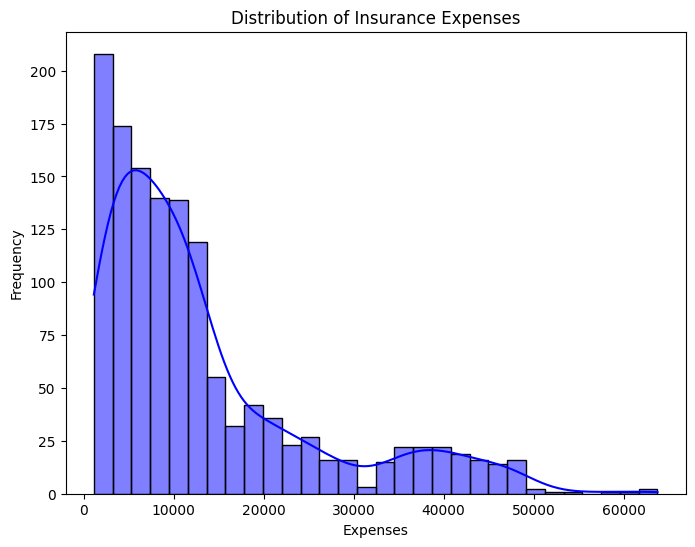

In [29]:
# Distribution plot: Expenses
plt.figure(figsize=(8, 6))
sns.histplot(data['expenses'], kde=True, color='blue', bins=30)
plt.title('Distribution of Insurance Expenses')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Display results
print("Regression Results:")
for model, metrics in results.items():
    print(f"{model}: RMSE={metrics['RMSE']:.2f}, MAE={metrics['MAE']:.2f}, R2={metrics['R2']:.2f}")


Regression Results:
Linear Regression: RMSE=5796.56, MAE=4181.56, R2=0.78
KNN: RMSE=6838.66, MAE=3886.13, R2=0.70
Decision Tree: RMSE=6505.13, MAE=3145.89, R2=0.73
Random Forest: RMSE=4571.90, MAE=2556.08, R2=0.87
SVR: RMSE=12897.60, MAE=8606.60, R2=-0.07


In [33]:
# Display classification results
print("\nClassification Metrics:")
for name, metrics in classification_results.items():
    print(f"{name}: Accuracy={metrics['Accuracy']:.2f}, F1 Score={metrics['F1 Score']:.2f}")



Classification Metrics:
Linear Regression: Accuracy=0.85, F1 Score=0.84
KNN: Accuracy=0.87, F1 Score=0.86
Decision Tree: Accuracy=0.87, F1 Score=0.86
Random Forest: Accuracy=0.87, F1 Score=0.86
SVR: Accuracy=0.82, F1 Score=0.76
